Pandas library was first developed by Wes McKinney in 2008 for data manipulation and analysis.

#### References:
    www.python.org
    www.numpy.org
    www.matplotlib.org
    https://pandas.pydata.org

#### Questions/feedback: petert@digipen.edu

# Chapter12 Correlation
- Variance
- Standard Deviation
- Covariance
- Correlation
- Trend
- Relationship
- Causation

### Import:

In [1]:
import pandas as pd                     # using 'pd'  is standard by Python users
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Correlation
Correlation measures how two variables change together, both in the direction and in the closeness of their movements.

Correlation is a measure of the relationship between two variables
- correlation coefficient
    - number
    - between 0 and 1
- sign
    - direction of relation
    - \+ or -

#### Examples:
    0:  no relationship
    1:  "one to one" relation

    positive relationship: as one variable increases, the other also increases
    negative relationship: as one variable increases, the other decreases

##### Visualize "no relationship" between two variables using scatterplot:

In [ ]:
np.random.rand?

In [2]:
np.random.rand()

0.9191093368738861

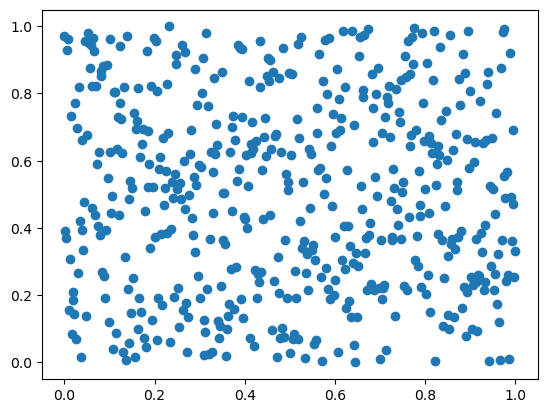

In [15]:
x = np.linspace(0, 1, 500)
y = np.random.rand(500)
plt.scatter(x, y)
plt.show()

##### Visualize "positive relationship" between two variables using scatterplot:

In [13]:
np.random.randn(3) / 5

array([-0.1807213 ,  0.0861162 , -0.02744756])

In [29]:
np.random.randint(0,2) * 2 - 1

1

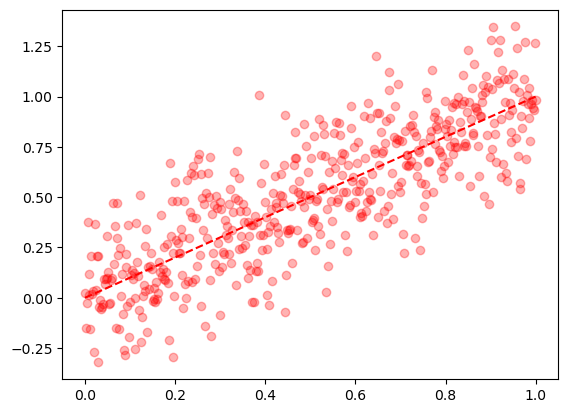

In [30]:
# x = np.linspace(0,1, 500)
y = x + (np.random.randint(0,2)*2-1) * np.random.randn(500) / 5  # notice the sign generator
plt.scatter(x, y, color="red", alpha=0.3)
plt.plot(x, x, color="red", linestyle="--")
plt.show()

#### Notes:
- this is not a "one to one" relationship
- the added noise: **randn(1000) / 5**, creating some random fraction of the values of the first variable
- the sign generator: **randint(0,2) * 2 - 1**, so we can alter the second variable in both direction
- the dashed red line is a straight line assuming there is a linear relation between the two variables
    - a brand new observation would be expected to be close to the red line

##### Visualize "negative relationship" between two variables using scatterplot:

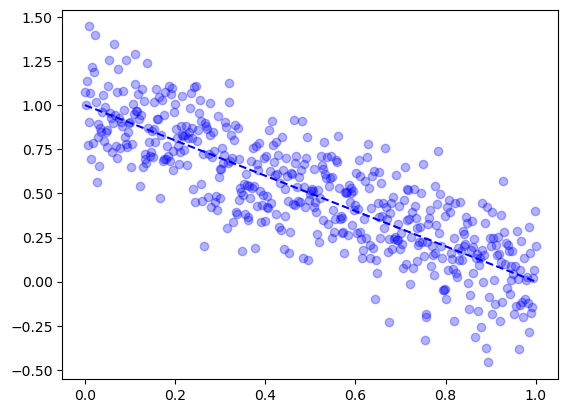

In [31]:
x = np.linspace(0,1, 500)
y = 1 - (x + (np.random.randint(0,2)*2-1) * np.random.randn(500) / 5)
plt.scatter(x, y, color="blue", alpha=0.3)
plt.plot(x, 1 - x, color="blue", linestyle="--")
plt.show()

##### Stronger correlations:

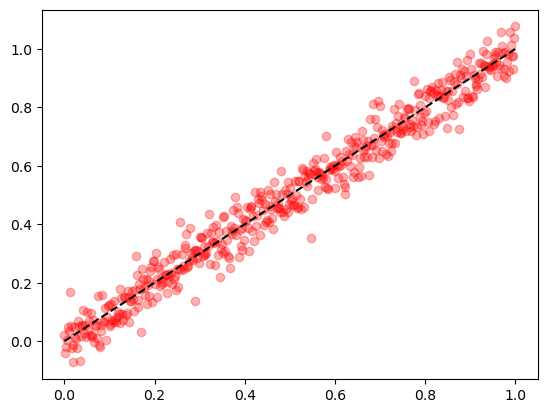

In [32]:
x = np.linspace(0,1, 500)
y = x + (np.random.randint(0,2)*2-1) * np.random.randn(500) / 20  # notice the sign generator
plt.scatter(x, y, color="red", alpha=0.3)
plt.plot(x,x, color="black", linestyle="--")
plt.show()

##### Even stronger correlation:

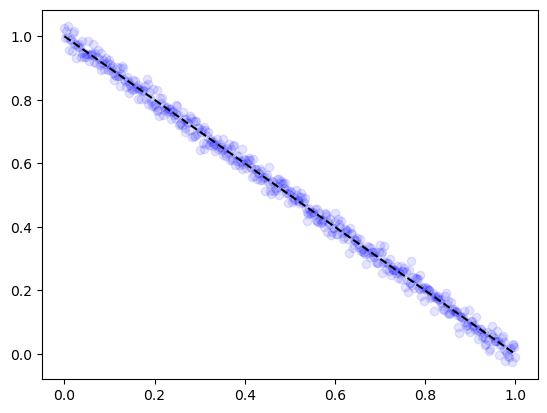

In [36]:
x = np.linspace(0,1, 500)
y = 1 - (x + (np.random.randint(0,2)*2-1) * np.random.randn(500) / 50)
plt.scatter(x, y, color="blue", alpha=0.1)
plt.plot(x, 1 - x, color="black", linestyle="--")
plt.show()

##### Extreme correlation coefficient values:
As the correlation coefficient is closer to 1 (or -1 for negative correlation), the better the data is described by a straight line, that is a linear equation.

    If correlation coefficient =  1 : the data set is perfectly aligned
    If correlation coefficient = -1 : the data set is perfectly aligned
    If correlation coefficient ≈  0 : little or no straight-line relationship

##### Strength categories of correlation coefficient values:
There are no exact intervals, all depends on the variables what is considered strong(er) correlation.

Below are acceptable descriptions of correlation strength/weakness:

        1.0       one to one
        0.9 =<      strong       < 1.0
        0.4 =< relatively strong < 0.9
        0.2 =<     moderate      < 0.4
        0.0 <        weak        < 0.2
        0.0          none

##### Calculating correlation. Formulas:
- Variance is measuring the average of the squared differences from the mean. The formula (full population taken into account):
\begin{equation}\sigma^{2}=\frac{\sum_{i=1}^{N} (X_{i} -\mu)^{2}}N\end{equation}
- Standard deviation is the square root of variance.
\begin{equation}\sigma=\sqrt{\frac{\sum_{i=1}^{N} (X_{i} -\mu)^{2}}{N}}\end{equation}
- Covariance measures the total variation between two random variables
\begin{equation}c_{x,y}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i} -\bar{y})}N\end{equation}
- Correlation is normalized covariance
\begin{equation}r_{x,y}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i} -\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}(y_{i}-\bar{y})^{2}}}\end{equation}

##### Calculating correlation using NumPy:

        np.corrcoeff(feature1, feature2)
    or
        np.corrcoeff(feature1, feature2)[0,1]
    or
        np.corrcoeff([feature1, feature2, feature3, ...])

Examples:

In [39]:
# correlation coefficient matrix (array) of two variables:
np.corrcoef(x, y)

array([[ 1.        , -0.99775867],
       [-0.99775867,  1.        ]])

In [42]:
# correlation coefficient of two variables:
np.corrcoef(x, y)[0, 1]

-0.9977586685933469

In [43]:
# correlation coefficient matrix (array) of more variables:
np.corrcoef([x, y, -x, 2 * x, x ** 2])      # using a list for more than two variables

array([[ 1.        , -0.99775867, -1.        ,  1.        ,  0.96812495],
       [-0.99775867,  1.        ,  0.99775867, -0.99775867, -0.96636013],
       [-1.        ,  0.99775867,  1.        , -1.        , -0.96812495],
       [ 1.        , -0.99775867, -1.        ,  1.        ,  0.96812495],
       [ 0.96812495, -0.96636013, -0.96812495,  0.96812495,  1.        ]])

In [44]:
# load iris dataset
iris = np.genfromtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", delimiter=",")

In [46]:
# remove the non-numerical feature
iris = iris[:,0:4]

In [47]:
# create correlation matrix using numpy
np.corrcoef([iris[:,0],iris[:,1],iris[:,2],iris[:,3]])

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [48]:
# create separate datasets per species
iris_setosa     = iris[  0: 50,:]
iris_versicolor = iris[ 50:100,:]
iris_virginica  = iris[100:150,:]

In [49]:
# correlation matrix for setosa
np.corrcoef([iris_setosa[:,0],iris_setosa[:,1],iris_setosa[:,2],iris_setosa[:,3]])

array([[1.        , 0.74678037, 0.26387409, 0.27909157],
       [0.74678037, 1.        , 0.17669463, 0.27997289],
       [0.26387409, 0.17669463, 1.        , 0.30630821],
       [0.27909157, 0.27997289, 0.30630821, 1.        ]])

In [50]:
# correlation matrix for versicolor
np.corrcoef([iris_versicolor[:,0],iris_versicolor[:,1],iris_versicolor[:,2],iris_versicolor[:,3]])

array([[1.        , 0.52591072, 0.75404896, 0.54646107],
       [0.52591072, 1.        , 0.56052209, 0.66399872],
       [0.75404896, 0.56052209, 1.        , 0.78666809],
       [0.54646107, 0.66399872, 0.78666809, 1.        ]])

In [51]:
# correlation matrix for virginica
np.corrcoef([iris_virginica[:,0],iris_virginica[:,1],iris_virginica[:,2],iris_virginica[:,3]])

array([[1.        , 0.45722782, 0.86422473, 0.28110771],
       [0.45722782, 1.        , 0.40104458, 0.53772803],
       [0.86422473, 0.40104458, 1.        , 0.32210822],
       [0.28110771, 0.53772803, 0.32210822, 1.        ]])

Lets calculate correlation using dataframes!

In [52]:
# switch to pandas dataframes
df = pd.DataFrame(iris)
# create dataframes per species
df_setosa = pd.DataFrame(iris_setosa)
df_versicolor = pd.DataFrame(iris_versicolor)
df_virginica = pd.DataFrame(iris_virginica)
# take a peak at the dataframe
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
pd.DataFrame.corr?

In [53]:
df.corr()

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


In [ ]:
plt.matshow?

In [55]:
df.columns = ['1st', '2nd', '3', '4']
df.corr().columns

Index(['1st', '2nd', '3', '4'], dtype='object')

In [57]:
df

,1st,2nd,3,4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df

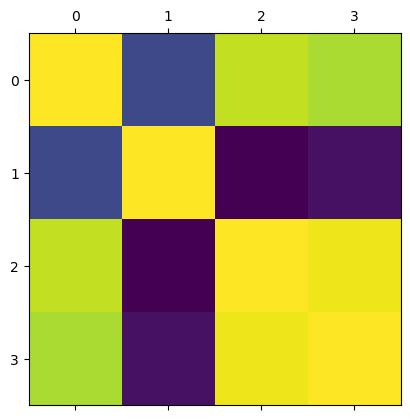

In [58]:
plt.matshow(df.corr())
plt.show()

Correlation matrices:


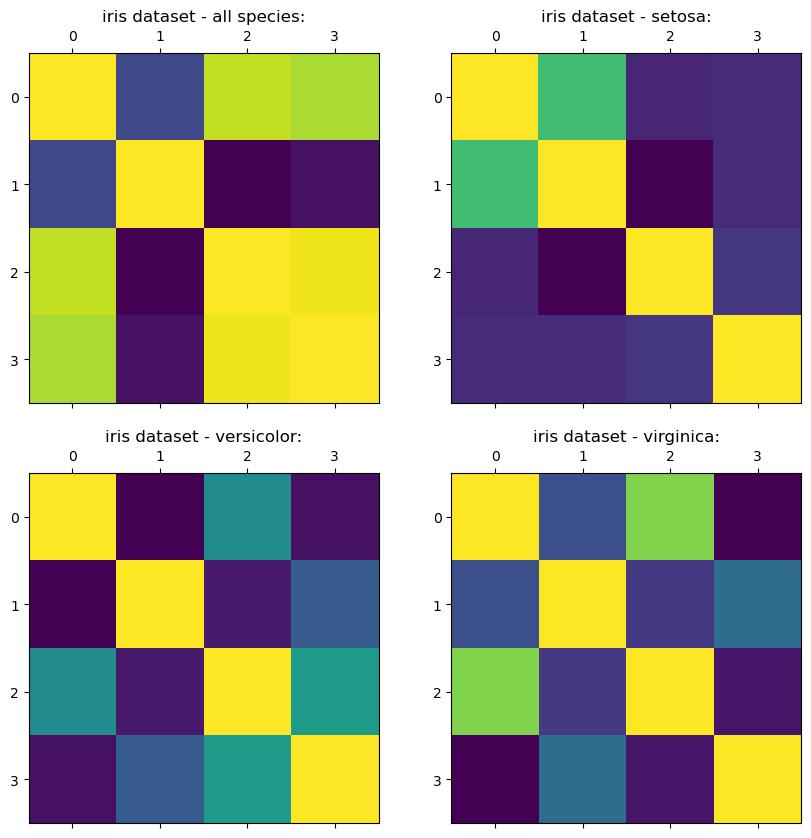

In [59]:
# display correlation heatmaps for all the data and per species
print("Correlation matrices:")
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
ax[0,0].matshow(df.corr())
ax[0,0].title.set_text('iris dataset - all species:')
ax[0,1].matshow(df_setosa.corr())
ax[0,1].title.set_text('iris dataset - setosa:')
ax[1,0].matshow(df_versicolor.corr())
ax[1,0].title.set_text('iris dataset - versicolor:')
ax[1,1].matshow(df_virginica.corr())
ax[1,1].title.set_text('iris dataset - virginica:')
plt.show()

Back to the iris dataset and its correlation matrix:

In [60]:
np.corrcoef([iris_virginica[:,0],iris_virginica[:,1],iris_virginica[:,2],iris_virginica[:,3]])

array([[1.        , 0.45722782, 0.86422473, 0.28110771],
       [0.45722782, 1.        , 0.40104458, 0.53772803],
       [0.86422473, 0.40104458, 1.        , 0.32210822],
       [0.28110771, 0.53772803, 0.32210822, 1.        ]])

Lets use rounding to make it more readable:

In [61]:
np.round(np.corrcoef([iris_virginica[:,0],iris_virginica[:,1],iris_virginica[:,2],iris_virginica[:,3]]), 2)

array([[1.  , 0.46, 0.86, 0.28],
       [0.46, 1.  , 0.4 , 0.54],
       [0.86, 0.4 , 1.  , 0.32],
       [0.28, 0.54, 0.32, 1.  ]])

or use .round:

In [62]:
np.corrcoef([iris_virginica[:,0],iris_virginica[:,1],iris_virginica[:,2],iris_virginica[:,3]]).round(2)

array([[1.  , 0.46, 0.86, 0.28],
       [0.46, 1.  , 0.4 , 0.54],
       [0.86, 0.4 , 1.  , 0.32],
       [0.28, 0.54, 0.32, 1.  ]])

Lets use colors to make it even more readable:

In [63]:
pd.DataFrame(np.corrcoef([iris_virginica[:,0],iris_virginica[:,1],iris_virginica[:,2],iris_virginica[:,3]])).style.background_gradient(cmap='coolwarm')

,0,1,2,3
0,1.000000,0.457228,0.864225,0.281108
1,0.457228,1.000000,0.401045,0.537728
2,0.864225,0.401045,1.000000,0.322108
3,0.281108,0.537728,0.322108,1.000000


Or apply the same on the dataframe example:

In [64]:
display(df.head())
df.corr()

,1st,2nd,3,4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,1st,2nd,3,4
1st,1.000000,-0.109369,0.871754,0.817954
2nd,-0.109369,1.000000,-0.420516,-0.356544
3,0.871754,-0.420516,1.000000,0.962757
4,0.817954,-0.356544,0.962757,1.000000


In [65]:
df.corr().style.background_gradient(cmap='coolwarm')

,1st,2nd,3,4
1st,1.000000,-0.109369,0.871754,0.817954
2nd,-0.109369,1.000000,-0.420516,-0.356544
3,0.871754,-0.420516,1.000000,0.962757
4,0.817954,-0.356544,0.962757,1.000000


### Correlation vs. Causation
- Correlation: can be measured by correlation coefficient
- Causation: X --> Y, X causing (or have affect on) Y

#### Correlation is NOT causation!
Examples (https://youtu.be/VMUQSMFGBDo):
- Ice cream kills... (ice cream sold vs. crime rate)
- Ice cream and forest fires
    - There maybe an external factor with impact on both
- Margarine consumption and divorce rate

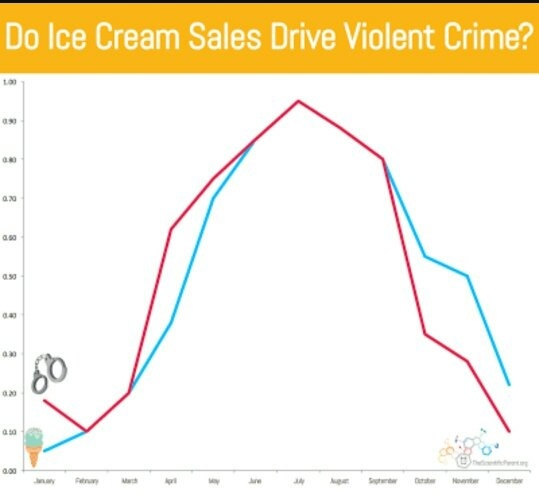
<center>Source: quora.com</center>

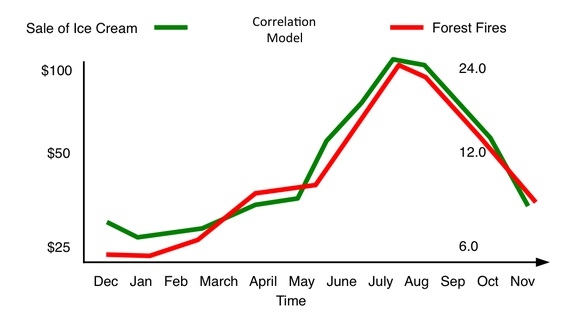
<center>Source: decisionskills.com</center>

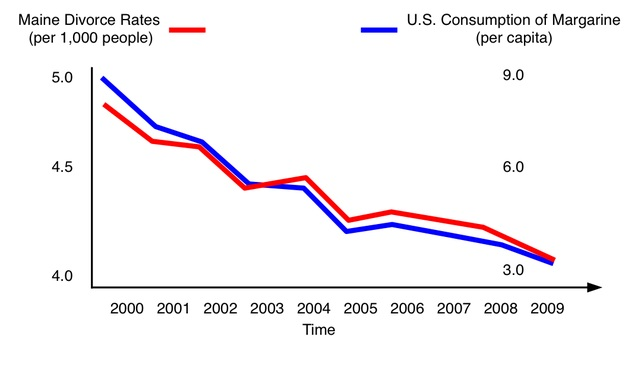
<center>Source: decisionskills.com</center>

#### Exercise 12.1:
Use NumPy's corrcoef()
- Calculate correlation between all numerical features of the iris dataset
    - Identify strong and very strong correlations
- Calculate correlation between all numerical features of the iris dataset per different species
    - Identify strong and very strong correlations per species
    - Compare the correlations between all three species

In [ ]:
# Exercise 12.1 code:



#### Exercise 12.2:
Use Pandas matshow(*dataframe*.corr():
- Display correlation heatmap between all numerical features of the iris dataset
- Display correlation heatmaps between all numerical features of the iris dataset per different species
    - Compare the correlations between all three species

In [ ]:
# Exercise 12.2 code:

